In [1]:
import os # İşletim sistemi modülünü içe aktar
import cv2  # OpenCV modülünü içe aktar ve 'cv2' olarak adlandır
import random 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [2]:
# Veri seti yollarını güncelle
base_dir = 'D:/CNN-Proje/Dataset'
images_dir = 'D:/CNN-Proje/Dataset/FS-2020/640x360/640x360/train'
masks_dir = 'D:/CNN-Proje/Dataset/FS-2020/labels/labels/areas/train_labels_1920x1080'


In [3]:
# Diğer değişkenleri tanımla
image_size = 512
number = 20

In [4]:
# Veri okuma fonksiyonu
def read_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (image_size, image_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [5]:
# Veri setini hazırla
images_listdir = os.listdir(images_dir)[:number]
images = np.zeros((number, image_size, image_size, 3), dtype=np.uint8)
masks = np.zeros((number, image_size, image_size, 1), dtype=bool)

In [6]:
for i, file in enumerate(images_listdir):
    try:
        image = read_image(os.path.join(images_dir, file))
        images[i] = image

        mask = read_image(os.path.join(masks_dir, file))
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = (mask > 0).astype(np.uint8).reshape(image_size, image_size, 1)
        masks[i] = mask
    except:
        print(f"Error processing {file}")
        continue


In [7]:
# Veriyi eğitim ve test olarak ayır
images_train, images_test, masks_train, masks_test = train_test_split(
    images, masks, test_size=0.4, random_state=42
)

In [8]:
# Eğitim veri seti boyutları
print("Eğitim Veri Seti:")
print("Görüntü boyutları:", images_train.shape)
print("Maskelerin boyutları:", masks_train.shape)

# Test veri seti boyutları
print("\nTest Veri Seti:")
print("Görüntü boyutları:", images_test.shape)
print("Maskelerin boyutları:", masks_test.shape)


Eğitim Veri Seti:
Görüntü boyutları: (12, 512, 512, 3)
Maskelerin boyutları: (12, 512, 512, 1)

Test Veri Seti:
Görüntü boyutları: (8, 512, 512, 3)
Maskelerin boyutları: (8, 512, 512, 1)


In [9]:
# CNN modeli tanımlama 
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(image_size * image_size, activation='sigmoid'))
model.add(layers.Reshape((image_size, image_size, 1)))

In [10]:
# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# TensorFlow modeli hakkında bilgi al
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 256)     295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 256)      0

Epoch 1/150
3/3 [==============================] - 13s 3s/step - loss: 1.2454 - accuracy: 0.5303 - val_loss: 0.8315 - val_accuracy: 0.5310
Epoch 2/150
3/3 [==============================] - 13s 4s/step - loss: 0.7515 - accuracy: 0.5376 - val_loss: 0.6891 - val_accuracy: 0.5318
Epoch 3/150
3/3 [==============================] - 10s 3s/step - loss: 0.5472 - accuracy: 0.6964 - val_loss: 2.3093 - val_accuracy: 0.8230
Epoch 4/150
3/3 [==============================] - 11s 3s/step - loss: 1.2264 - accuracy: 0.9173 - val_loss: 2.5334 - val_accuracy: 0.8256
Epoch 5/150
3/3 [==============================] - 11s 3s/step - loss: 1.1478 - accuracy: 0.9170 - val_loss: 2.4136 - val_accuracy: 0.8328
Epoch 6/150
3/3 [==============================] - 11s 3s/step - loss: 1.1057 - accuracy: 0.9174 - val_loss: 1.0164 - val_accuracy: 0.8295
Epoch 7/150
3/3 [==============================] - 10s 3s/step - loss: 0.4216 - accuracy: 0.9018 - val_loss: 0.8867 - val_accuracy: 0.8412
Epoch 8/150
3/3 [==========

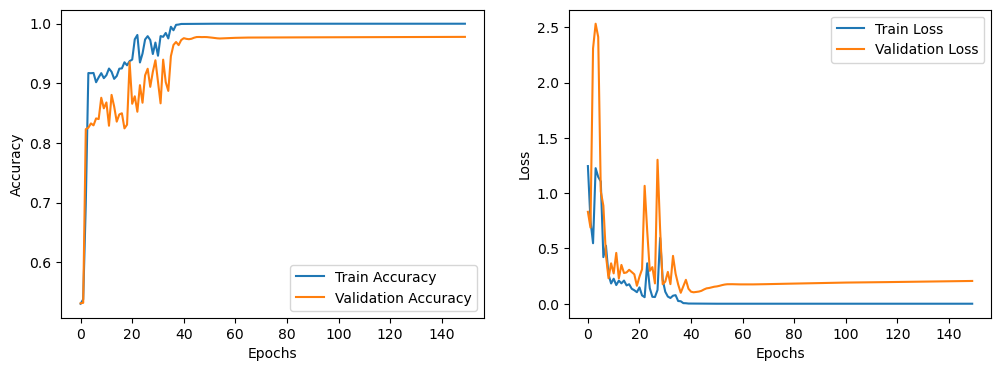

In [12]:
# Eğitim döngüsü
history = model.fit(images_train, masks_train, validation_split=0.2, batch_size=4, epochs=150)

# Eğitim sürecindeki accuracy ve loss'u gösteren grafikler
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
import pandas as pd
import json
#Test verisinin etkiet verilerinin incelenmesi
# JSON dosyasını oku
with open('D:/CNN-Proje/Dataset/FS-2020/labels/labels/lines/test_labels_640x360.json', 'r') as file:
    data = json.load(file)

# DataFrame için boş bir liste oluştur
df_list = []

# JSON verisini DataFrame'e dönüştür
for filename, annotations in data.items():
    for annotation in annotations:
        row = {
            'Dosya Adı': filename,
            'Etiket': annotation['label'],
            'Koordinatlar': annotation['points'],
            'Group ID': annotation['group_id'],
            'Shape Type': annotation['shape_type'],
            'Flags': annotation['flags']
        }
        df_list.append(row)

# DataFrame'i oluştur
df = pd.DataFrame(df_list)

# 'Koordinatlar' sütunundaki liste elemanlarını çıkar
df = df.explode('Koordinatlar')

# 'Koordinatlar' sütununu iki ayrı sütuna ayır
df[['X1', 'Y1']] = pd.DataFrame(df['Koordinatlar'].tolist(), index=df.index)
df = df.drop('Koordinatlar', axis=1)

# 'Flags' sütunundaki içeriği DataFrame'e çıkar
df = df.join(pd.json_normalize(df['Flags']).add_prefix('Flag_'))
df = df.drop('Flags', axis=1)

# 'Group ID' sütununu kaldır
df = df.drop('Group ID', axis=1)

# Veri çerçevesinin başını (ilk 5 satır) gösterme
print("Veri Çerçevesinin Düzenlenmiş Hali:")
print(df.head(5587))

# Veri çerçevesinin genel bilgilerini gösterme
print("\nVeri Çerçevesinin Bilgileri:")
print(df.info())


Veri Çerçevesinin Düzenlenmiş Hali:
                    Dosya Adı Etiket Shape Type     X1     Y1
0     VHHH25R1_8FNLImage5.png   LEDG       line  278.4  184.0
0     VHHH25R1_8FNLImage5.png   LEDG       line  234.8  222.3
1     VHHH25R1_8FNLImage5.png   REDG       line  285.9  184.5
1     VHHH25R1_8FNLImage5.png   REDG       line  256.3  221.9
2     VHHH25R1_8FNLImage5.png   PAPI       line  268.1  210.3
...                       ...    ...        ...    ...    ...
2791  ZUXJ02_1_6FNLImage4.png   REDG       line  431.9  236.7
2791  ZUXJ02_1_6FNLImage4.png   REDG       line  436.3  217.2
2792  ZUXJ02_1_6FNLImage4.png   AimP       line  424.0  229.8
2792  ZUXJ02_1_6FNLImage4.png   AimP       line  431.7  228.8
2793   LGAV03R3_8LDImage3.png   LEDG       line  413.8  149.3

[5587 rows x 5 columns]

Veri Çerçevesinin Bilgileri:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15266 entries, 0 to 7632
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      

In [14]:
#Train verisinin etkiet verilerinin incelenmesi
# JSON dosyasını oku
with open('D:/CNN-Proje/Dataset/FS-2020/labels/labels/lines/train_labels_640x360.json', 'r') as file:
    data = json.load(file)

# DataFrame için boş bir liste oluştur
df_list = []

# JSON verisini DataFrame'e dönüştür
for filename, annotations in data.items():
    for annotation in annotations:
        row = {
            'Dosya Adı': filename,
            'Etiket': annotation['label'],
            'Koordinatlar': annotation['points'],
            'Group ID': annotation['group_id'],
            'Shape Type': annotation['shape_type'],
            'Flags': annotation['flags']
        }
        df_list.append(row)

# DataFrame'i oluştur
df = pd.DataFrame(df_list)

# 'Koordinatlar' sütunundaki liste elemanlarını çıkar
df = df.explode('Koordinatlar')

# 'Koordinatlar' sütununu iki ayrı sütuna ayır
df[['X1', 'Y1']] = pd.DataFrame(df['Koordinatlar'].tolist(), index=df.index)
df = df.drop('Koordinatlar', axis=1)

# 'Flags' sütunundaki içeriği DataFrame'e çıkar
df = df.join(pd.json_normalize(df['Flags']).add_prefix('Flag_'))
df = df.drop('Flags', axis=1)

# 'Group ID' sütununu kaldır
df = df.drop('Group ID', axis=1)

# Veri çerçevesinin başını (ilk 5 satır) gösterme
print("Veri Çerçevesinin Düzenlenmiş Hali:")
print(df.head(5587))

# Veri çerçevesinin genel bilgilerini gösterme
print("\nVeri Çerçevesinin Bilgileri:")
print(df.info())


Veri Çerçevesinin Düzenlenmiş Hali:
                    Dosya Adı Etiket Shape Type     X1     Y1
0     PHNL08L4_2FNLImage3.png   LEDG       line  315.4  199.3
0     PHNL08L4_2FNLImage3.png   LEDG       line  309.2  222.0
1     PHNL08L4_2FNLImage3.png   REDG       line  320.0  199.0
1     PHNL08L4_2FNLImage3.png   REDG       line  320.2  221.7
2     PHNL08L4_2FNLImage3.png   AimP       line  311.3  217.3
...                       ...    ...        ...    ...    ...
2791  LXGB09_2_2FNLImage1.png   REDG       line   79.6  177.8
2791  LXGB09_2_2FNLImage1.png   REDG       line   93.9  204.4
2792  LXGB09_2_2FNLImage1.png   AimP       line   79.8  193.0
2792  LXGB09_2_2FNLImage1.png   AimP       line   87.4  194.1
2793  LXGB09_2_2FNLImage1.png    THR       line   82.4  200.7

[5587 rows x 5 columns]

Veri Çerçevesinin Bilgileri:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38036 entries, 0 to 19017
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------     

In [15]:
test_loss, test_acc = model.evaluate(images_test, masks_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 1s 1s/step - loss: 0.1094 - accuracy: 0.9754
Test Accuracy: 0.9753975868225098


In [16]:
predictions = model.predict(images_test)

1/1 [==============================] - 2s 2s/step


In [17]:
threshold = 0.5
predictions_binary = (predictions > threshold).astype(np.uint8)

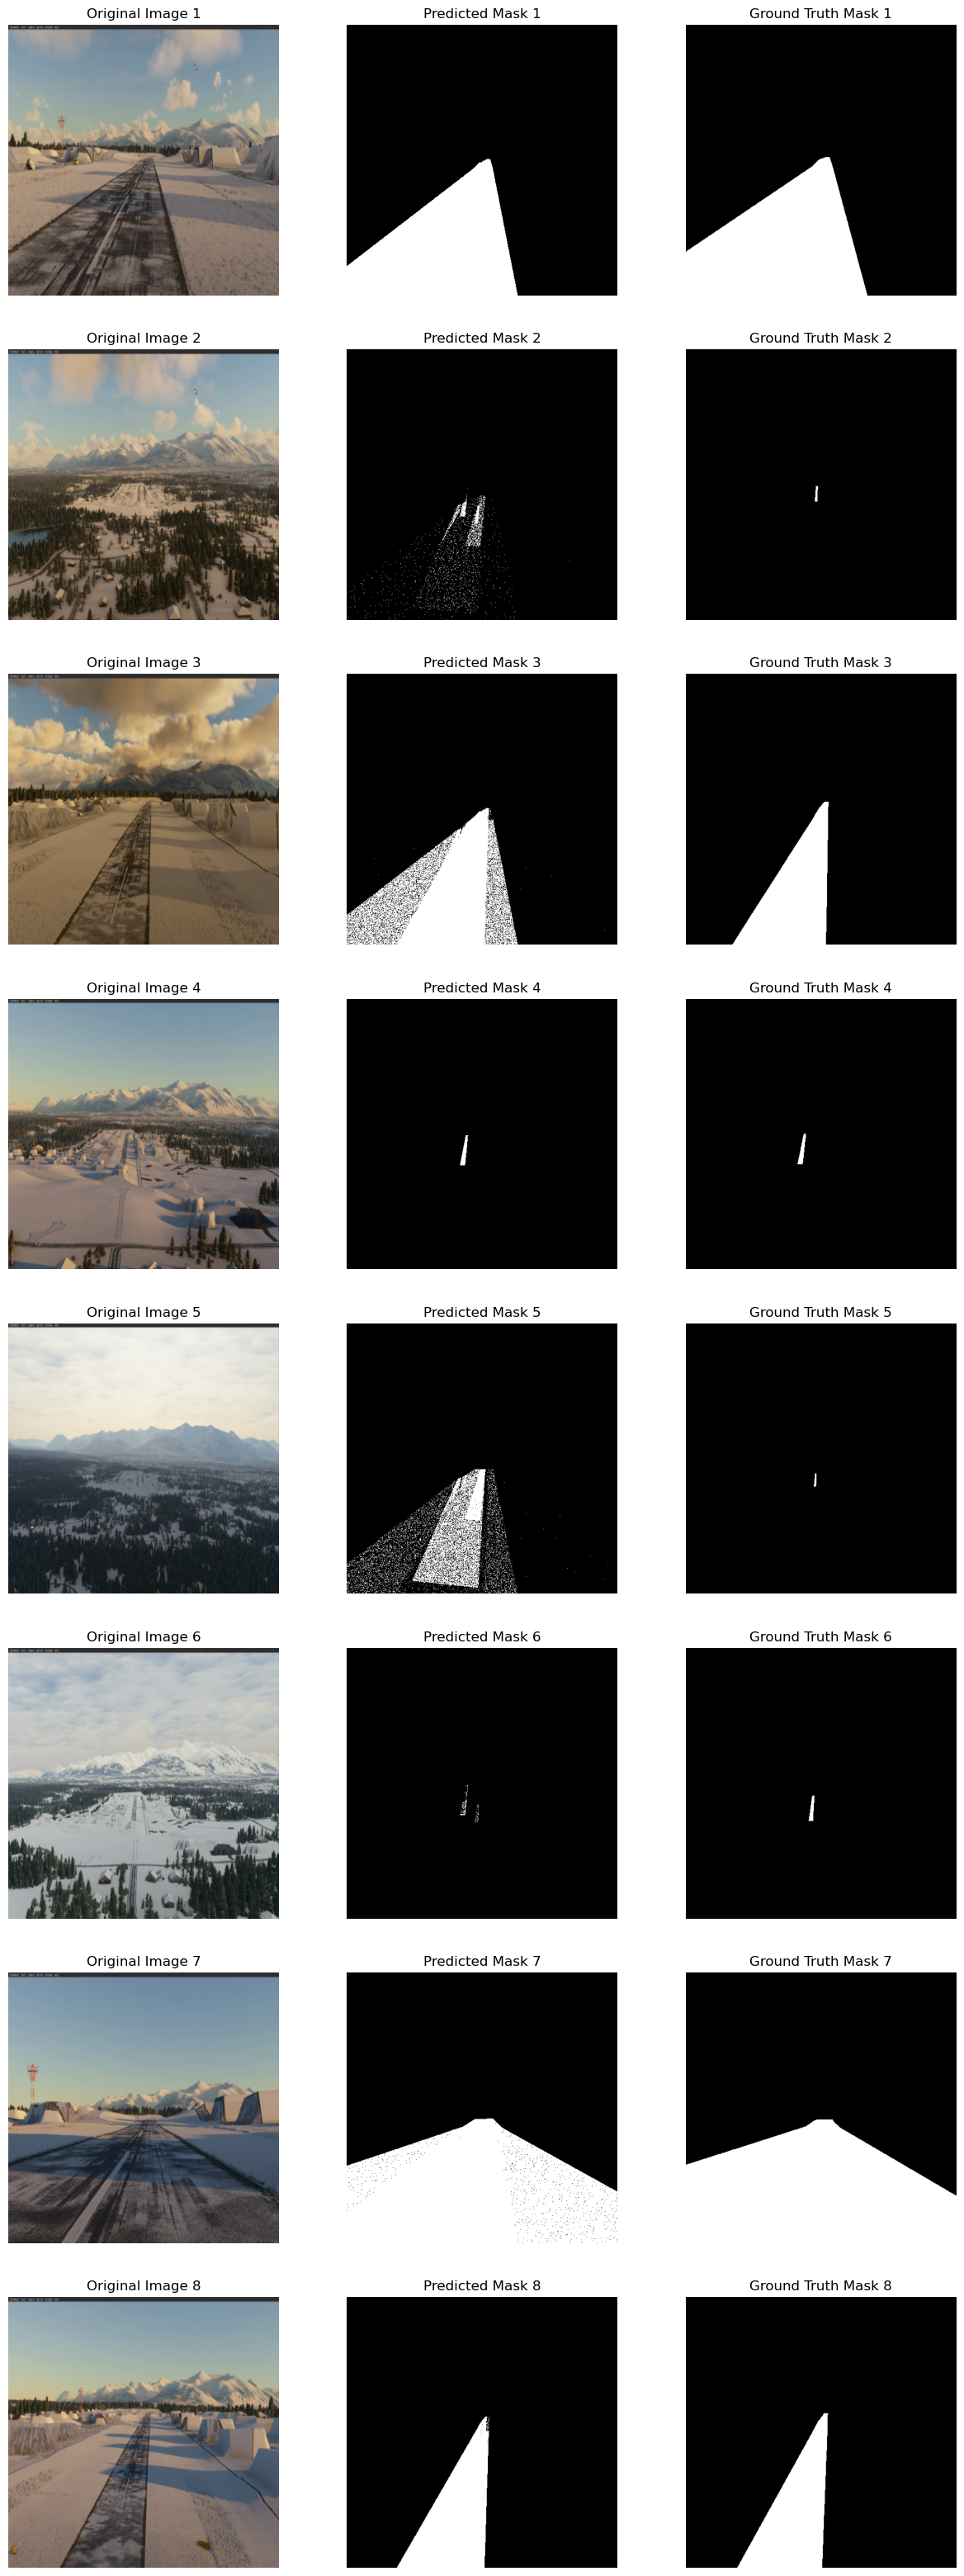

In [18]:
# Rastgele örnek sayısını, test setindeki örnek sayısına eşitle
sample_size = min(10, len(images_test))
random_indices = random.sample(range(len(images_test)), sample_size)

plt.figure(figsize=(15, 5 * sample_size))

for i, idx in enumerate(random_indices, 1):
    plt.subplot(sample_size, 3, 3 * i - 2)
    plt.imshow(images_test[idx])
    plt.title(f'Original Image {i}')
    plt.axis('off')

    plt.subplot(sample_size, 3, 3 * i - 1)
    plt.imshow(predictions_binary[idx].squeeze(), cmap='gray')
    plt.title(f'Predicted Mask {i}')
    plt.axis('off')

    plt.subplot(sample_size, 3, 3 * i)
    plt.imshow(masks_test[idx].squeeze(), cmap='gray')
    plt.title(f'Ground Truth Mask {i}')
    plt.axis('off')

plt.show()